In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("Datasets/Social_Network_Ads.csv")

<Axes: >

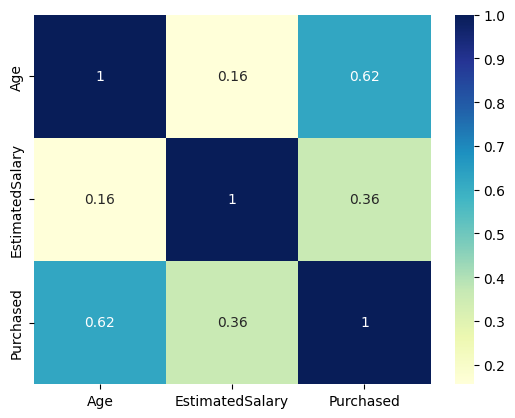

In [3]:
sns.heatmap(data=df.corr(), annot=True, cmap='YlGnBu')

In [4]:
X=df.iloc[:,:-1]
y=df["Purchased"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [8]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [10]:
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 93.0
Accuracy with k=1 87.0


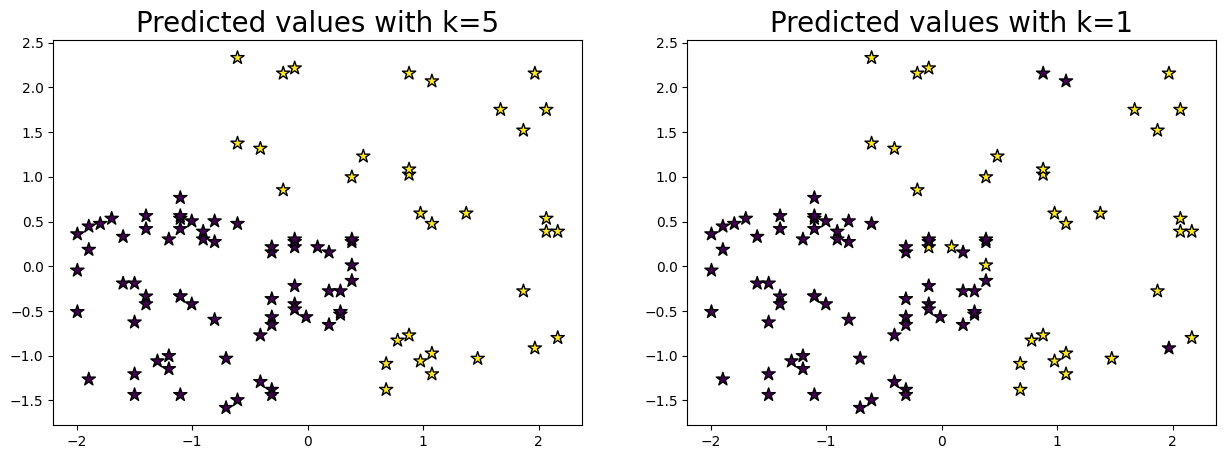

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_1, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=1", fontsize=20)
plt.show()